In [2]:
import pandas as pd

df_canonicalized = pd.read_csv("lit-pcba_all_data.csv")
df_raw = pd.read_csv("lit-pcba_all_data_no_canonicalization.csv")


/tmp/ipykernel_43167/354051998.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_canonicalized = pd.read_csv("lit-pcba_all_data.csv")
/tmp/ipykernel_43167/354051998.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("lit-pcba_all_data_no_canonicalization.csv")


In [13]:
df_c = df_canonicalized[df_canonicalized["receptor"]=="ADRB2"]
smiles_c = df_c.canonical_smiles.tolist()
type_c = df_c.type.tolist()
id_c = df_c.mol_id.tolist()

In [26]:
# Quick sanity check - pick a few examples and manually inspect
df_c_dupes = df_c[df_c.duplicated(subset=['canonical_smiles'], keep=False)].sort_values('canonical_smiles')

print("Canonicalized duplicates:")
df_c_dupes.head(20)

Canonicalized duplicates:


,receptor,mol_id,smiles,type,canonical_smiles
159842,ADRB2,17414049,Br\C(\C=N\N1CC[NH+](Cc2ccccc2)CC1)=C/c3ccccc3,inactive_T,BrC(C=NN1CC[NH+](Cc2ccccc2)CC1)=Cc1ccccc1
91072,ADRB2,26661760,Br\C(\C=N\N1CC[NH+](Cc2ccccc2)CC1)=C\c3ccccc3,inactive_T,BrC(C=NN1CC[NH+](Cc2ccccc2)CC1)=Cc1ccccc1
163554,ADRB2,17407675,Br\C(\C=N\Nc1nc(N2CCOCC2)nc(N3CCOCC3)n1)=C\c4c...,inactive_T,BrC(C=NNc1nc(N2CCOCC2)nc(N2CCOCC2)n1)=Cc1ccccc1
153251,ADRB2,17509565,Br\C(\C=N\Nc1nc(N2CCOCC2)nc(N3CCOCC3)n1)=C/c4c...,inactive_T,BrC(C=NNc1nc(N2CCOCC2)nc(N2CCOCC2)n1)=Cc1ccccc1
265280,ADRB2,24841706,CC([C@@H]1C=C(C(NCC#C)=O)O[C@H](OCc2ccc(CO)cc2...,inactive_V,C#CCNC(=O)C1=CC(C(C)(C)C)CC(OCc2ccc(CO)cc2)O1
94049,ADRB2,24841709,CC([C@H]1C=C(C(NCC#C)=O)O[C@@H](OCc2ccc(CO)cc2...,inactive_T,C#CCNC(=O)C1=CC(C(C)(C)C)CC(OCc2ccc(CO)cc2)O1
85307,ADRB2,26725124,OCCCCO[C@H]1OC(C(NCC#C)=O)=C[C@@H](C2CC2)C1,inactive_T,C#CCNC(=O)C1=CC(C2CC2)CC(OCCCCO)O1
265306,ADRB2,24841562,OCCCCO[C@@H]1OC(C(NCC#C)=O)=C[C@H](C2CC2)C1,inactive_V,C#CCNC(=O)C1=CC(C2CC2)CC(OCCCCO)O1
94067,ADRB2,24841687,CCO[C@@H]1[C@@H](CCCO)[C@H](C2CCCCC2)C=C(C(NCC...,inactive_T,C#CCNC(=O)C1=CC(C2CCCCC2)C(CCCO)C(OCC)O1
94194,ADRB2,24841528,CCO[C@H]1[C@H](CCCO)[C@@H](C2CCCCC2)C=C(C(NCC#...,inactive_T,C#CCNC(=O)C1=CC(C2CCCCC2)C(CCCO)C(OCC)O1


In [ ]:
# seems all "duplicates" are just stereoisomers

In [30]:
sms_example = df_c_dupes[df_c_dupes["canonical_smiles"] == "C#CCNC(=O)C1=CC(C2CCCCC2)C(CCCO)C(OCC)O1"].smiles.tolist()

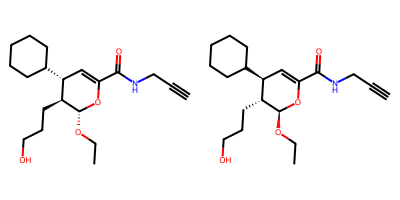

In [38]:
from rdkit import Chem
from rdkit.Chem import Draw

mols = [Chem.MolFromSmiles(s) for s in sms_example]
Draw.MolsToGridImage(mols, molsPerRow=2)